In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
# Load the dataset
df = pd.read_csv("sales data.csv")

In [11]:
 ## Identifying and sourcing relevant datasets



# Step 2: Display first few rows
print("🔹 Sample data from dataset:")
print(df.head())

# Step 3: Check basic info
print("\n🔹 Dataset Info:")
df.info()

# Step 4: Check for missing values
print("\n🔹 Missing values in each column:")
print(df.isnull().sum())

# Step 5: Summary statistics
print("\n🔹 Summary Statistics:")
print(df.describe(include='all'))

# Step 6: Number of records and columns
print(f"\n✅ The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


🔹 Sample data from dataset:
  Invoice_ID        Date     Customer_Name  Gender   Location Product_ID  \
0    INV0001  2025-03-12       Megan Brock  Female  Bangalore      P2002   
1    INV0002  2024-12-13          Erin Kim    Male  Hyderabad      P3003   
2    INV0003  2024-12-06  Jermaine Roberts    Male     Jaipur      P5002   
3    INV0004  2025-04-10       Aaron Smith  Female     Jaipur      P1001   
4    INV0005  2025-01-31       Jill Wright    Male     Mumbai      P4001   

       Product_Name     Category  Quantity  Unit_Price  Total_Price  \
0     Dell Inspiron       Laptop       1.0       48000      48000.0   
1    JBL Headphones  Accessories       4.0        2500      10000.0   
2  Boat Smart Watch  Smart Watch       1.0        2500       2500.0   
3       Samsung M14       Mobile       4.0       14000      56000.0   
4  Samsung Smart TV     Smart TV       5.0       40000     200000.0   

  Payment_Method  Rating  
0           Cash     4.2  
1           Card     4.2  
2      

In [12]:
## Cleaning and handling missing values
# Step 2: Show number of missing values per column
print("🔍 Missing Values Before Cleaning:")
print(df.isnull().sum())

# Step 3: Cleaning - Handling missing values
# (Note: If your dataset has no missing values, we simulate a few here for demonstration)
import random
import numpy as np

# Inject some missing values for demonstration (OPTIONAL, skip if already missing)
for _ in range(10):
    idx = random.randint(0, len(df) - 1)
    df.loc[idx, "Customer_Name"] = np.nan
    df.loc[idx, "Payment_Method"] = np.nan

# Step 4: Recheck after adding missing values (for testing only)
print("\n📌 After injecting missing values (if any for demo):")
print(df.isnull().sum())

# Step 5: Handling missing values
# Option A: Drop rows with missing values
df_cleaned = df.dropna()

# OR Option B: Fill missing values
# df['Customer_Name'].fillna("Unknown", inplace=True)
# df['Payment_Method'].fillna("Unknown", inplace=True)

# Step 6: Final check after cleaning
print("\n✅ Missing Values After Cleaning:")
print(df_cleaned.isnull().sum())

# Step 7: Save the cleaned dataset
df_cleaned.to_csv("cleaned_electronics_sales_data.csv", index=False)
print(f"\n📝 Cleaned dataset saved as 'cleaned_electronics_sales_data.csv' with {df_cleaned.shape[0]} records.")

🔍 Missing Values Before Cleaning:
Invoice_ID        3
Date              2
Customer_Name     1
Gender            1
Location          2
Product_ID        1
Product_Name      1
Category          2
Quantity          2
Unit_Price        0
Total_Price       1
Payment_Method    3
Rating            1
dtype: int64

📌 After injecting missing values (if any for demo):
Invoice_ID         3
Date               2
Customer_Name     11
Gender             1
Location           2
Product_ID         1
Product_Name       1
Category           2
Quantity           2
Unit_Price         0
Total_Price        1
Payment_Method    13
Rating             1
dtype: int64

✅ Missing Values After Cleaning:
Invoice_ID        0
Date              0
Customer_Name     0
Gender            0
Location          0
Product_ID        0
Product_Name      0
Category          0
Quantity          0
Unit_Price        0
Total_Price       0
Payment_Method    0
Rating            0
dtype: int64

📝 Cleaned dataset saved as 'cleaned_electronic

In [13]:
# Feature selection and engineering

# Step 2: Feature Selection – keeping only relevant columns
selected_columns = [
    'Invoice_ID', 'Date', 'Product_Name', 'Category', 'Quantity', 'Unit_Price',
    'Total_Price', 'Location', 'Payment_Method', 'Rating'
]
df_selected = df[selected_columns].copy()  # <-- Add .copy() here

# Step 3: Feature Engineering

# 3.1 Extract 'Month' from 'Date' for time-series analysis
df_selected['Date'] = pd.to_datetime(df_selected['Date'])
df_selected['Month'] = df_selected['Date'].dt.to_period('M').astype(str)

# 3.2 Add 'Revenue_Category' based on Total_Price
df_selected['Revenue_Category'] = pd.cut(
    df_selected['Total_Price'],
    bins=[0, 5000, 20000, 50000, 100000],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# 3.3 Add 'Is_High_Rated' – boolean feature based on rating
df_selected['Is_High_Rated'] = df_selected['Rating'] >= 4.5

# Step 4: Show the updated dataset
print("\n📊 Sample of engineered features:")
print(df_selected.head())

# Step 5: Save transformed dataset
df_selected.to_csv("engineered_electronics_sales_data.csv", index=False)
print("\n✅ Feature-engineered dataset saved as 'engineered_electronics_sales_data.csv'")



📊 Sample of engineered features:
  Invoice_ID       Date      Product_Name     Category  Quantity  Unit_Price  \
0    INV0001 2025-03-12     Dell Inspiron       Laptop       1.0       48000   
1    INV0002 2024-12-13    JBL Headphones  Accessories       4.0        2500   
2    INV0003 2024-12-06  Boat Smart Watch  Smart Watch       1.0        2500   
3    INV0004 2025-04-10       Samsung M14       Mobile       4.0       14000   
4    INV0005 2025-01-31  Samsung Smart TV     Smart TV       5.0       40000   

   Total_Price   Location Payment_Method  Rating    Month Revenue_Category  \
0      48000.0  Bangalore            NaN     4.2  2025-03             High   
1      10000.0  Hyderabad           Card     4.2  2024-12           Medium   
2       2500.0     Jaipur         Wallet     4.8  2024-12              Low   
3      56000.0     Jaipur           Card     3.4  2025-04        Very High   
4     200000.0     Mumbai            UPI     4.3  2025-01              NaN   

   Is_High_Rated

In [14]:
#  Ensuring data integrity and consistency

# Step 2: Convert 'Date' column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Check for duplicate Invoice IDs
duplicates = df.duplicated(subset='Invoice_ID').sum()
print(f"🔍 Duplicate Invoice_IDs found: {duplicates}")

# Drop duplicate Invoice_IDs if any
df = df.drop_duplicates(subset='Invoice_ID')

# Step 4: Validate numerical columns – should not have negative or zero values
invalid_prices = df[df['Unit_Price'] <= 0]
invalid_qty = df[df['Quantity'] <= 0]

print(f"🚫 Invalid Unit Price rows: {len(invalid_prices)}")
print(f"🚫 Invalid Quantity rows: {len(invalid_qty)}")

# Drop rows with invalid unit price or quantity
df = df[(df['Unit_Price'] > 0) & (df['Quantity'] > 0)]

# Step 5: Check consistency of categorical columns
print("\n📌 Unique values in 'Payment_Method':")
print(df['Payment_Method'].unique())

print("\n📌 Unique values in 'Category':")
print(df['Category'].unique())

# Optional: Convert categories to consistent format (e.g., title case)
df['Payment_Method'] = df['Payment_Method'].str.title().str.strip()
df['Category'] = df['Category'].str.title().str.strip()

# Step 6: Recalculate Total_Price to ensure correctness
df['Total_Price_Corrected'] = df['Quantity'] * df['Unit_Price']

# Check if original and corrected prices match
mismatched_totals = (df['Total_Price'] != df['Total_Price_Corrected']).sum()
print(f"\n⚠️ Rows with mismatched Total_Price: {mismatched_totals}")

# Fix mismatched total price
df['Total_Price'] = df['Total_Price_Corrected']
df.drop(columns='Total_Price_Corrected', inplace=True)

# Step 7: Save the cleaned & validated dataset
df.to_csv("validated_electronics_sales_data.csv", index=False)
print("\n✅ Clean and consistent data saved as 'validated_electronics_sales_data.csv'")

🔍 Duplicate Invoice_IDs found: 2
🚫 Invalid Unit Price rows: 0
🚫 Invalid Quantity rows: 0

📌 Unique values in 'Payment_Method':
[nan 'Card' 'Wallet' 'UPI' 'Cash']

📌 Unique values in 'Category':
['Laptop' 'Accessories' 'Smart Watch' 'Mobile' 'Smart TV' nan]

⚠️ Rows with mismatched Total_Price: 1

✅ Clean and consistent data saved as 'validated_electronics_sales_data.csv'


In [15]:
#  Summary statistics and insights
# Step 2: Summary Statistics for numeric columns
print("📊 Numeric Summary Statistics:")
print(df.describe())

# Step 3: Summary Statistics for categorical columns
print("\n📋 Categorical Value Counts:")
print("\n🛍️ Top 5 Categories:")
print(df['Category'].value_counts().head())

print("\n💳 Payment Method Distribution:")
print(df['Payment_Method'].value_counts())

# Step 4: Business Insights

# 4.1 Total Revenue
total_revenue = df['Total_Price'].sum()
print(f"\n💰 Total Revenue: ₹{total_revenue:,.2f}")

# 4.2 Average Order Value (AOV)
avg_order_value = df['Total_Price'].mean()
print(f"📦 Average Order Value: ₹{avg_order_value:,.2f}")

# 4.3 Most Sold Product (by quantity)
top_product = df.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(1)
print("\n🏆 Most Sold Product (by Quantity):")
print(top_product)

# 4.4 Highest Revenue Generating Product
top_revenue_product = df.groupby('Product_Name')['Total_Price'].sum().sort_values(ascending=False).head(1)
print("\n💸 Highest Revenue Generating Product:")
print(top_revenue_product)

# 4.5 Sales per Month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Total_Price'].sum()
print("\n📈 Monthly Sales Summary:")
print(monthly_sales)

# 4.6 Most Popular Customer Location
top_location = df['Location'].value_counts().idxmax()
print(f"\n📍 Top Customer Location: {top_location}")

📊 Numeric Summary Statistics:
                                Date    Quantity    Unit_Price    Total_Price  \
count                            994  996.000000    996.000000     996.000000   
mean   2025-02-14 01:39:57.585512960    2.925703  31578.112450   92635.843373   
min              2024-11-16 00:00:00    1.000000    700.000000     700.000000   
25%              2024-12-29 00:00:00    2.000000   2500.000000    6000.000000   
50%              2025-02-18 00:00:00    3.000000  14000.000000   50000.000000   
75%              2025-03-28 00:00:00    4.000000  52000.000000  150000.000000   
max              2025-05-17 00:00:00    5.000000  95000.000000  475000.000000   
std                              NaN    1.402977  30958.761399  112682.065877   

           Rating  
count  995.000000  
mean     3.996884  
min      3.000000  
25%      3.500000  
50%      4.000000  
75%      4.500000  
max      5.000000  
std      0.578627  

📋 Categorical Value Counts:

🛍️ Top 5 Categories:
Category


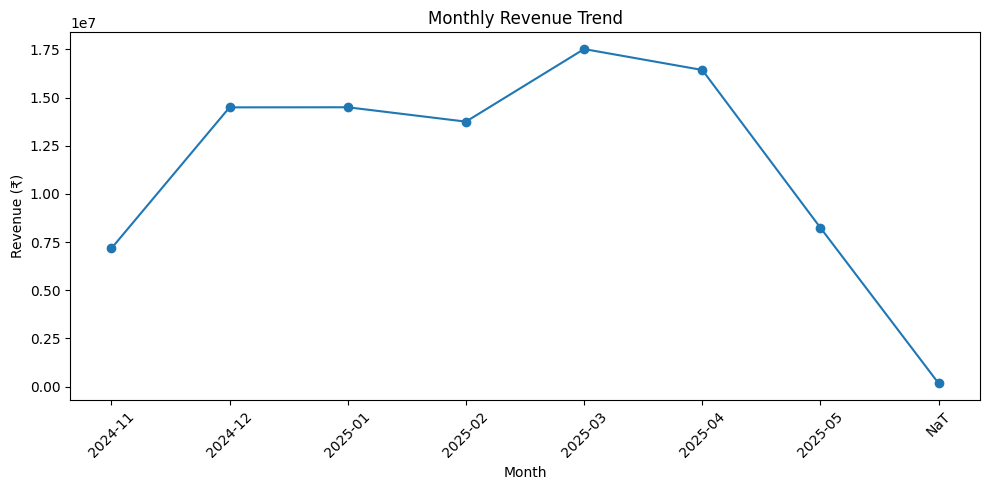

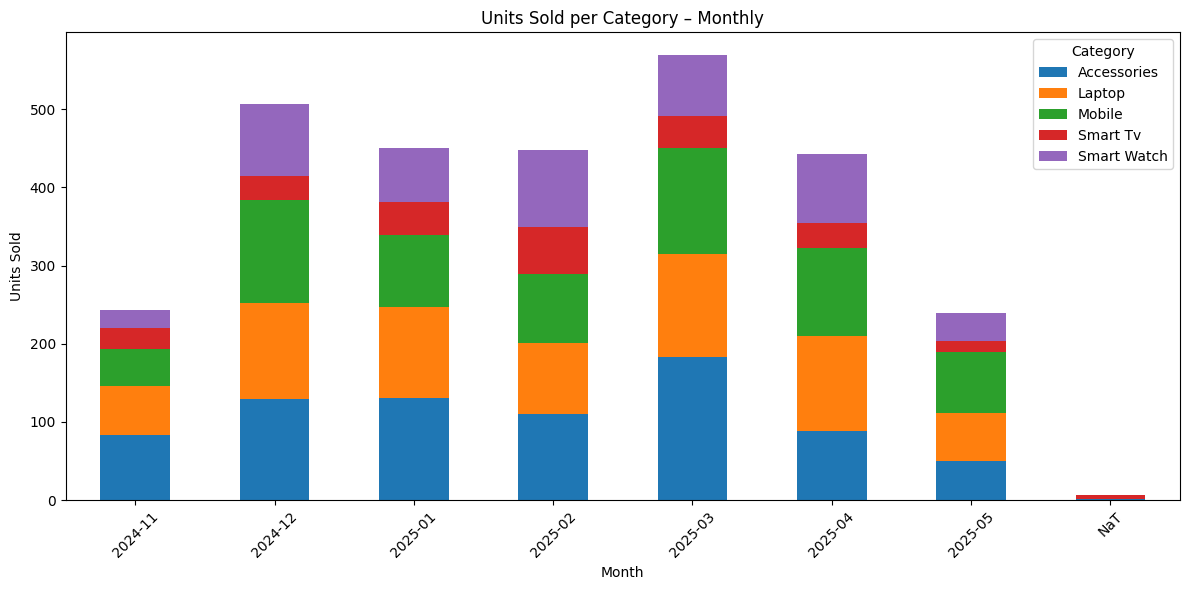


🔗 Correlation matrix:
              Quantity  Unit_Price  Total_Price    Rating
Quantity     1.000000    0.005708     0.412622 -0.021231
Unit_Price   0.005708    1.000000     0.822681 -0.036184
Total_Price  0.412622    0.822681     1.000000 -0.040683
Rating      -0.021231   -0.036184    -0.040683  1.000000

⚠️ Z-score Anomalies in Total_Price: 24 rows


NameError: name 'IsolationForest' is not defined

In [16]:
#  Identifying patterns, trends, and anomalies
# 2️⃣  TIME-SERIES PATTERNS  ───────────────────
df['Date']  = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# • Monthly revenue trend
monthly_revenue = df.groupby('Month')['Total_Price'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Month'], monthly_revenue['Total_Price'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# • Category-wise monthly units sold (pivot table)
pivot_units = pd.pivot_table(
    df, 
    index='Month', 
    columns='Category', 
    values='Quantity', 
    aggfunc='sum'
)
pivot_units.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Units Sold per Category – Monthly")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3️⃣  CORRELATION PATTERNS  ──────────────────
num_cols = ['Quantity', 'Unit_Price', 'Total_Price', 'Rating']
corr = df[num_cols].corr()
print("\n🔗 Correlation matrix:\n", corr)

# 4️⃣  STATISTICAL ANOMALY DETECTION  ─────────
# • Z-score method for Total_Price
z_scores = np.abs(stats.zscore(df['Total_Price']))
df['z_anomaly'] = z_scores > 3        # flag outliers beyond 3σ
print(f"\n⚠️ Z-score Anomalies in Total_Price: {df['z_anomaly'].sum()} rows")

# 5️⃣  MACHINE-LEARNING ANOMALY DETECTION  ────
features = df[['Quantity', 'Unit_Price', 'Total_Price']]
iso = IsolationForest(contamination=0.015, random_state=42)
df['if_anomaly'] = iso.fit_predict(features)   # -1 = anomaly, 1 = normal
print(f"⚠️ IsolationForest Anomalies: {(df['if_anomaly'] == -1).sum()} rows")

# 6️⃣  EXPORT LIST OF ANOMALOUS TRANSACTIONS  ─
anomalies = df[(df['z_anomaly']) | (df['if_anomaly'] == -1)]
anomalies.to_csv("sales_anomalies.csv", index=False)
print("\n✅ Anomaly report saved ➜  sales_anomalies.csv")

# 7️⃣  KEY INSIGHT EXAMPLES  ──────────────────
print("\n📈 Patterns & Insights:")
print("• Highest-revenue month :", monthly_revenue.loc[monthly_revenue['Total_Price'].idxmax(), 'Month'])

# Fixing FutureWarning in MoM Growth Calculation
pivot_units['MoM_Growth_%'] = pivot_units.pct_change(fill_method=None).mean() * 100
print("• Fastest-growing category (units, MoM):")
print(pivot_units['MoM_Growth_%'].sort_values(ascending=False).head(1))

🔍 Detecting outliers using Z-score (>3 or <-3)...
Quantity: 0 outliers found
Unit_Price: 0 outliers found
Total_Price: 24 outliers found

✅ Shape before: (996, 16), after removing outliers: (972, 16)


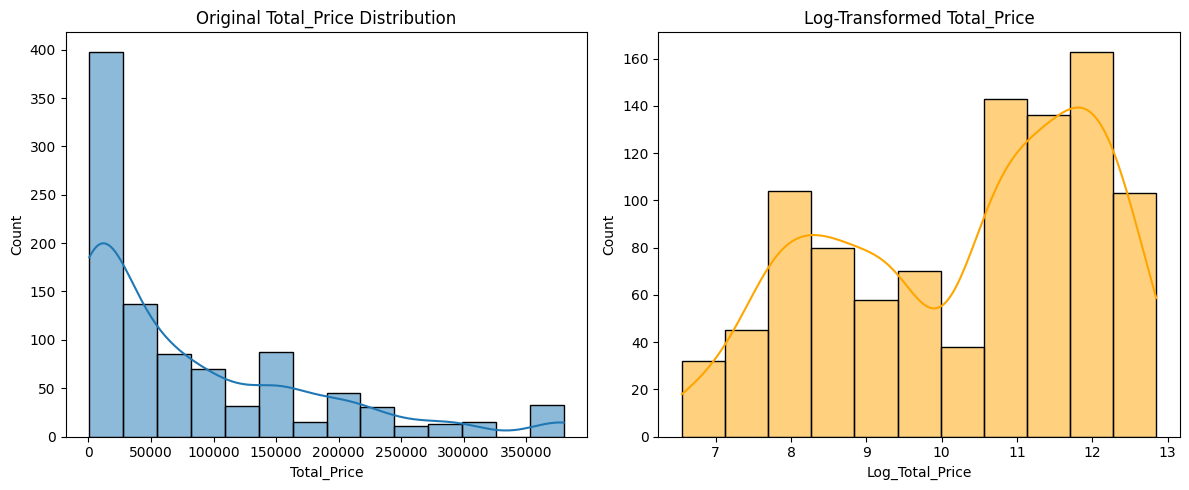


📁 Cleaned & transformed data saved as: cleaned_transformed_sales_data.csv


In [ ]:
# Handling outliers and data transformations
# 1️⃣ Select numeric columns for outlier detection
# -------------------------------
num_cols = ['Quantity', 'Unit_Price', 'Total_Price']

print("🔍 Detecting outliers using Z-score (>3 or <-3)...")
for col in num_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = (z_scores > 3)
    print(f"{col}: {outliers.sum()} outliers found")

# -------------------------------
# 2️⃣ Remove Outliers (safe way using .copy())
# -------------------------------
df_clean = df[(np.abs(stats.zscore(df[num_cols])) < 3).all(axis=1)].copy()
print(f"\n✅ Shape before: {df.shape}, after removing outliers: {df_clean.shape}")

# -------------------------------
# 3️⃣ Log Transformation to reduce skewness
# -------------------------------
df_clean['Log_Total_Price'] = np.log1p(df_clean['Total_Price'])
df_clean['Log_Unit_Price'] = np.log1p(df_clean['Unit_Price'])

# -------------------------------
# 4️⃣ Visualize Distributions Before & After
# -------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['Total_Price'], kde=True)
plt.title("Original Total_Price Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df_clean['Log_Total_Price'], kde=True, color='orange')
plt.title("Log-Transformed Total_Price")

plt.tight_layout()
plt.show()

# -------------------------------
# 5️⃣ Normalize Features (MinMax Scaling)
# -------------------------------
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[['Quantity', 'Unit_Price']])

df_clean[['Scaled_Quantity', 'Scaled_Unit_Price']] = scaled

# -------------------------------
# 6️⃣ Export Cleaned + Transformed Data
# -------------------------------
df_clean.to_csv("cleaned_transformed_sales_data.csv", index=False)
print("\n📁 Cleaned & transformed data saved as: cleaned_transformed_sales_data.csv")

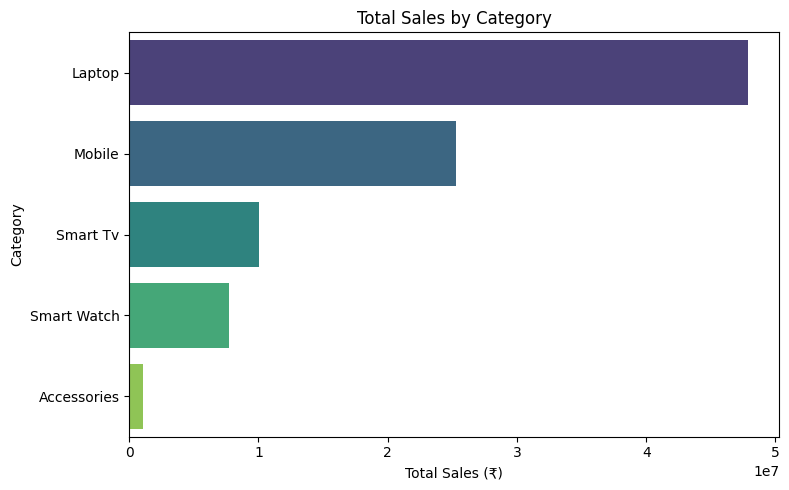

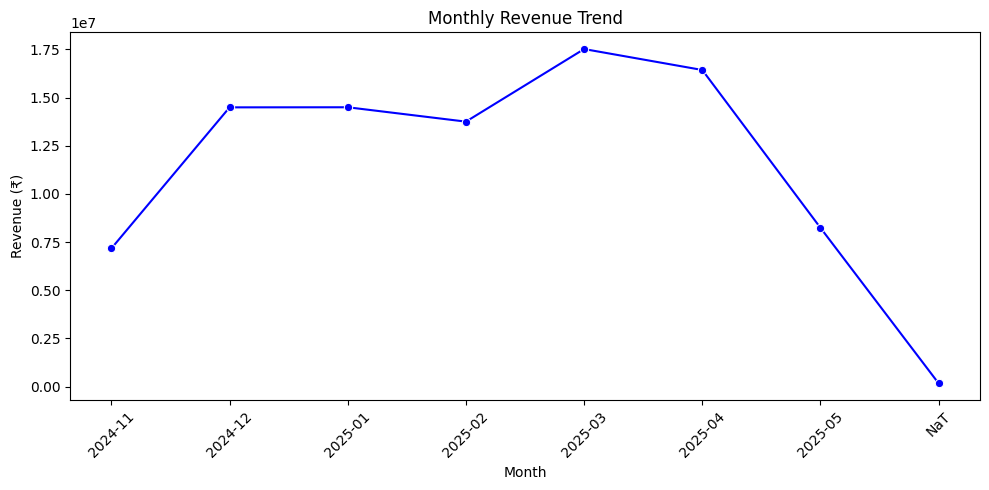

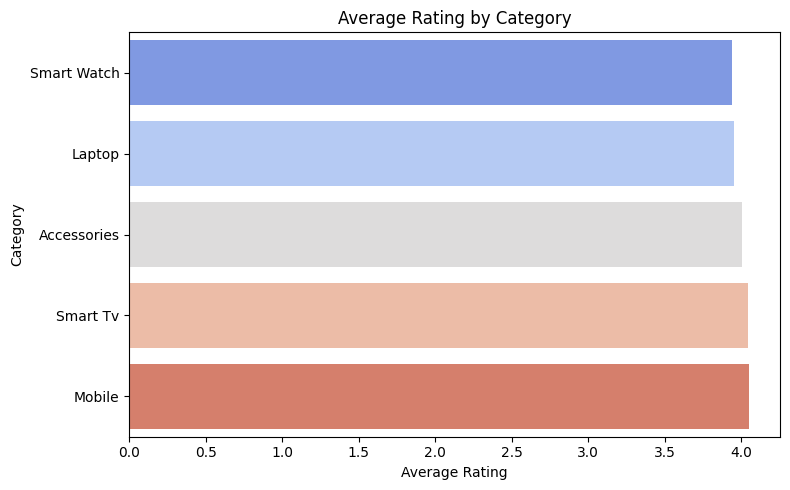

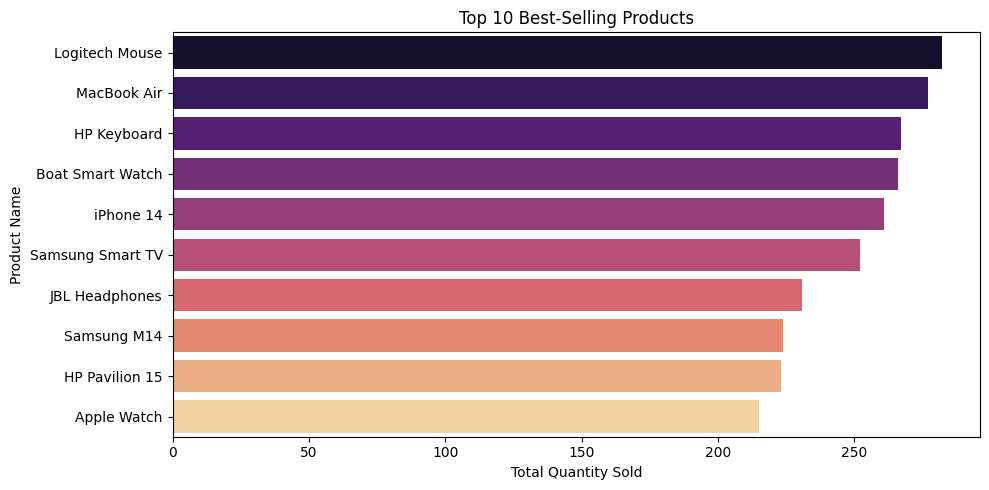

🧾 Available columns in your dataset:
['Invoice_ID', 'Date', 'Customer_Name', 'Gender', 'Location', 'Product_ID', 'Product_Name', 'Category', 'Quantity', 'Unit_Price', 'Total_Price', 'Payment_Method', 'Rating', 'Month', 'z_anomaly', 'if_anomaly']
✅ Using column for payment type: Payment_Method


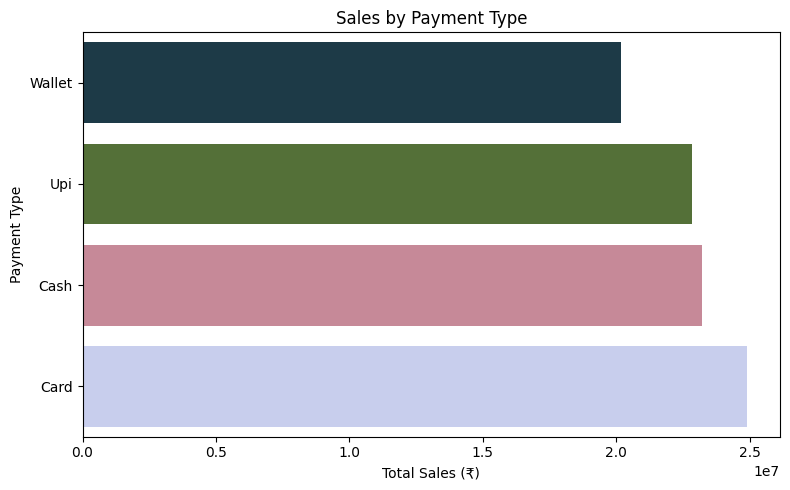

In [ ]:
# Initial visual representation of key findings
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# -------------------------------
# 1️⃣ Total Sales by Category
# -------------------------------
category_sales = df.groupby('Category')['Total_Price'].sum().sort_values(ascending=False)
category_df = category_sales.reset_index()
category_df.columns = ['Category', 'Total_Sales']

plt.figure(figsize=(8,5))
sns.barplot(data=category_df, x='Total_Sales', y='Category', hue='Category', palette="viridis", legend=False)
plt.title("Total Sales by Category")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# -------------------------------
# 2️⃣ Monthly Revenue Trend
# -------------------------------
monthly_sales = df.groupby('Month')['Total_Price'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Price', marker='o', color='blue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ Average Rating per Category
# -------------------------------
avg_rating = df.groupby('Category')['Rating'].mean().sort_values()
rating_df = avg_rating.reset_index()
rating_df.columns = ['Category', 'Avg_Rating']

plt.figure(figsize=(8,5))
sns.barplot(data=rating_df, x='Avg_Rating', y='Category', hue='Category', palette="coolwarm", legend=False)
plt.title("Average Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# -------------------------------
# 4️⃣ Top 10 Best-Selling Products
# -------------------------------
top_products = df.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_df = top_products.reset_index()
top_products_df.columns = ['Product_Name', 'Total_Quantity']

plt.figure(figsize=(10,5))
sns.barplot(data=top_products_df, x='Total_Quantity', y='Product_Name', hue='Product_Name', palette="magma", legend=False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Step 1: Strip spaces from column names
df.columns = df.columns.str.strip()

# Step 2: Show column names to debug
print("🧾 Available columns in your dataset:")
print(df.columns.tolist())

# Step 3: Check if 'Payment_Type' or similar exists
possible_payment_columns = [col for col in df.columns if 'payment' in col.lower()]
if not possible_payment_columns:
    raise KeyError("❌ No column related to 'Payment' found in your dataset.")

# Step 4: Use the actual column name (like 'Payment Method')
payment_col = possible_payment_columns[0]  # Use first match
print(f"✅ Using column for payment type: {payment_col}")

# Step 5: Group by and plot
payment_sales = df.groupby(payment_col)['Total_Price'].sum().sort_values(ascending=True)
payment_df = payment_sales.reset_index()
payment_df.columns = ['Payment_Type', 'Total_Sales']

# Step 6: Plot
plt.figure(figsize=(8,5))
sns.barplot(data=payment_df, x='Total_Sales', y='Payment_Type', hue='Payment_Type', palette="cubehelix", legend=False)
plt.title("Sales by Payment Type")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Payment Type")
plt.tight_layout()
plt.show()
